# Évaluation des performances

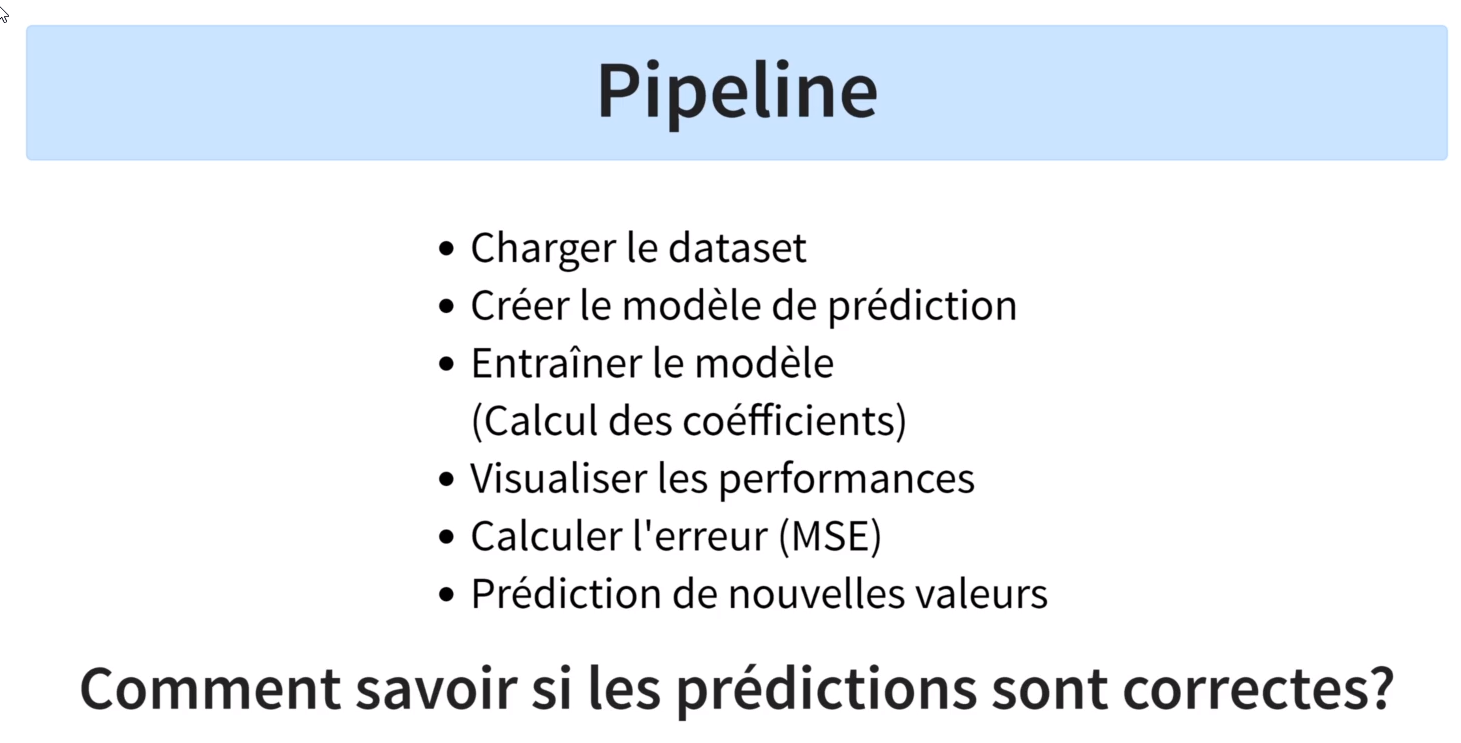

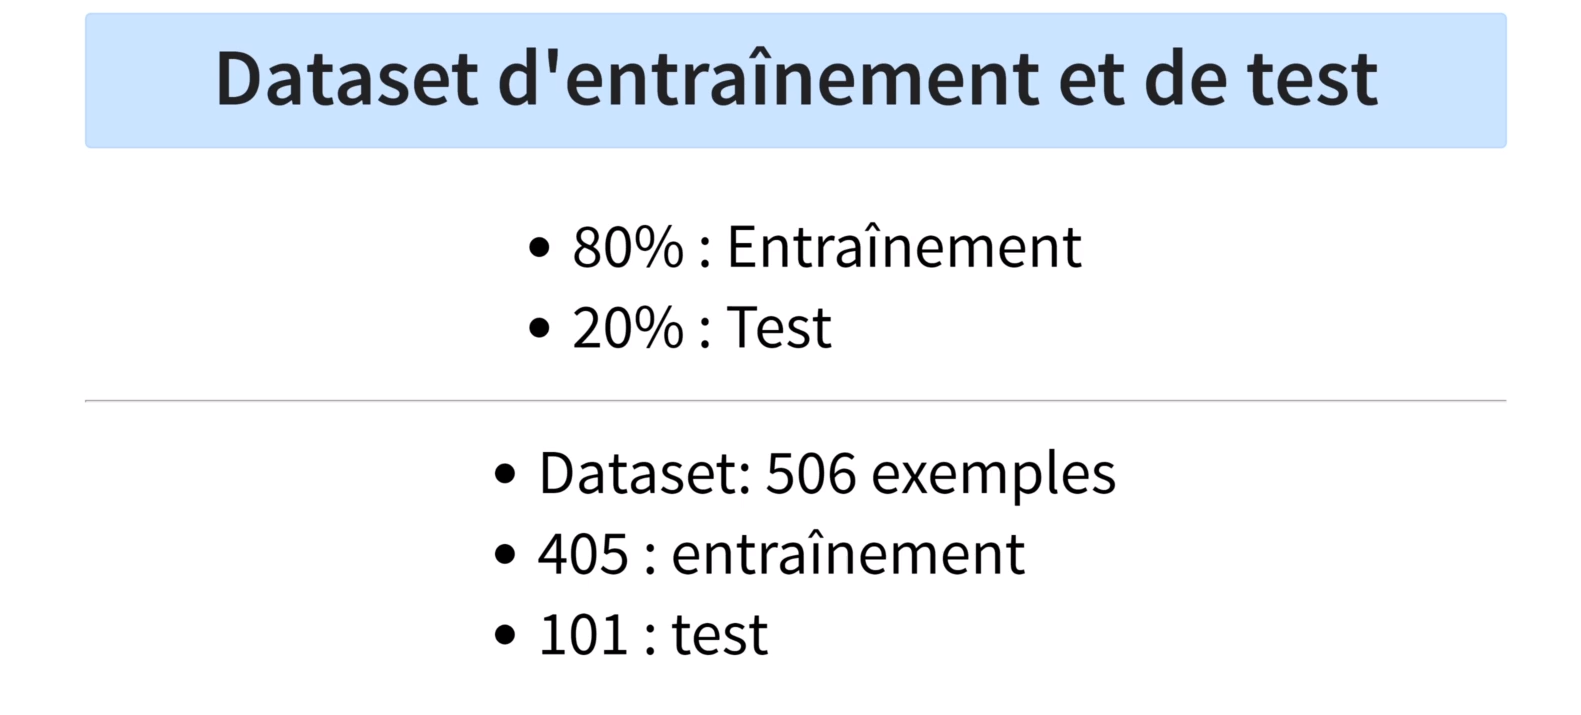

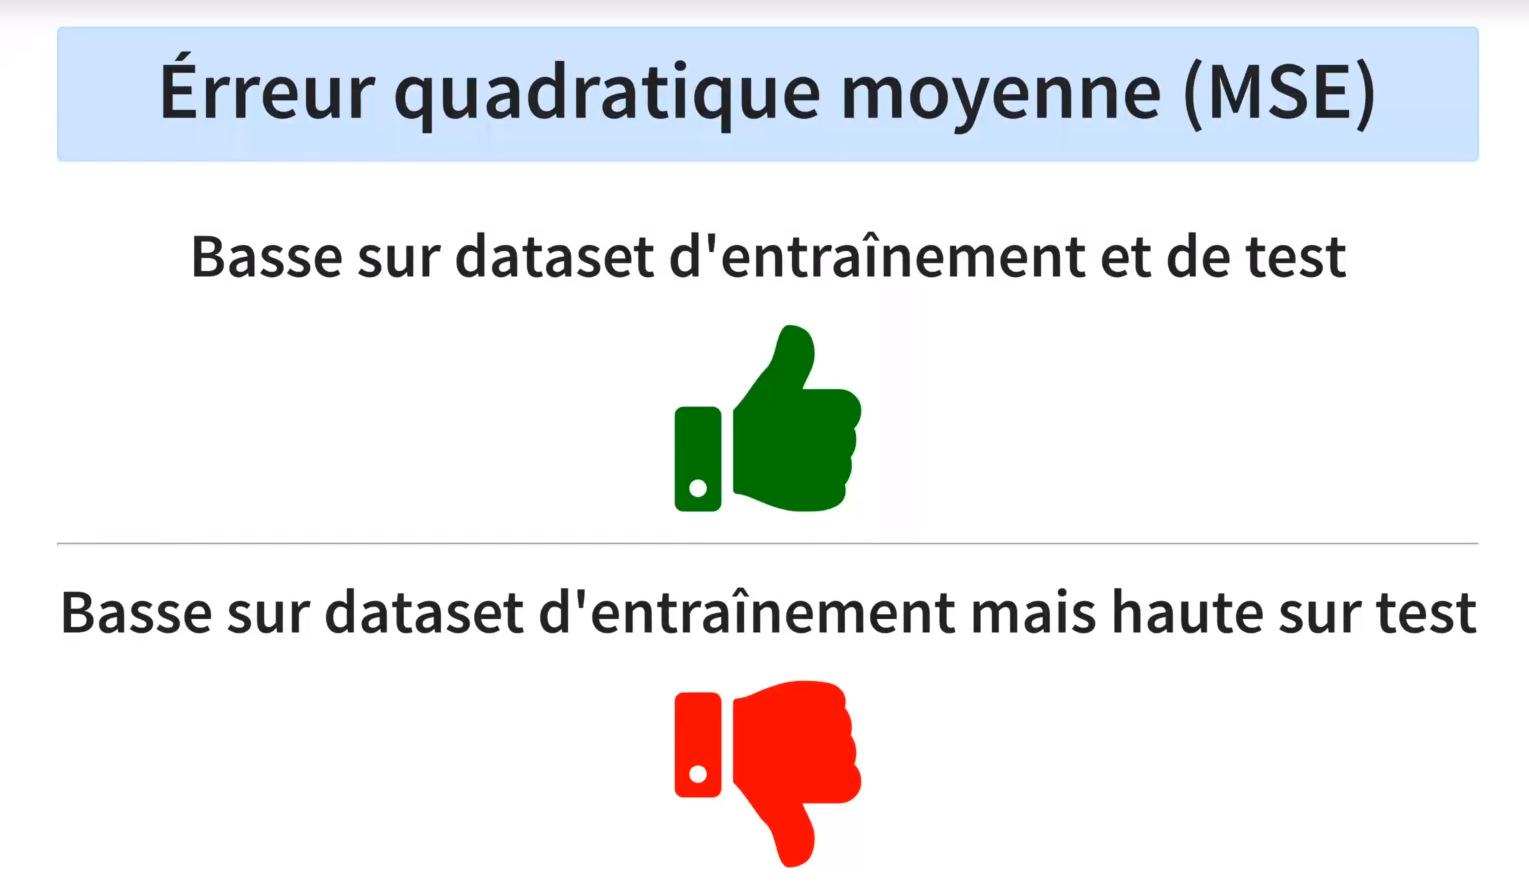

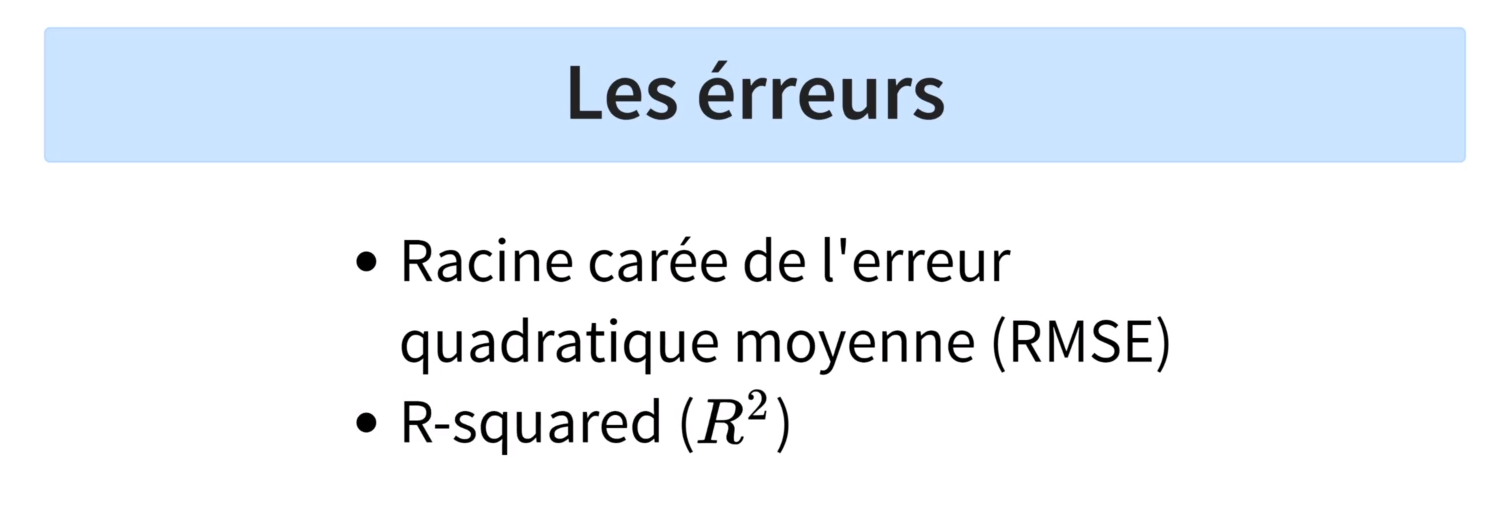

# RMSE

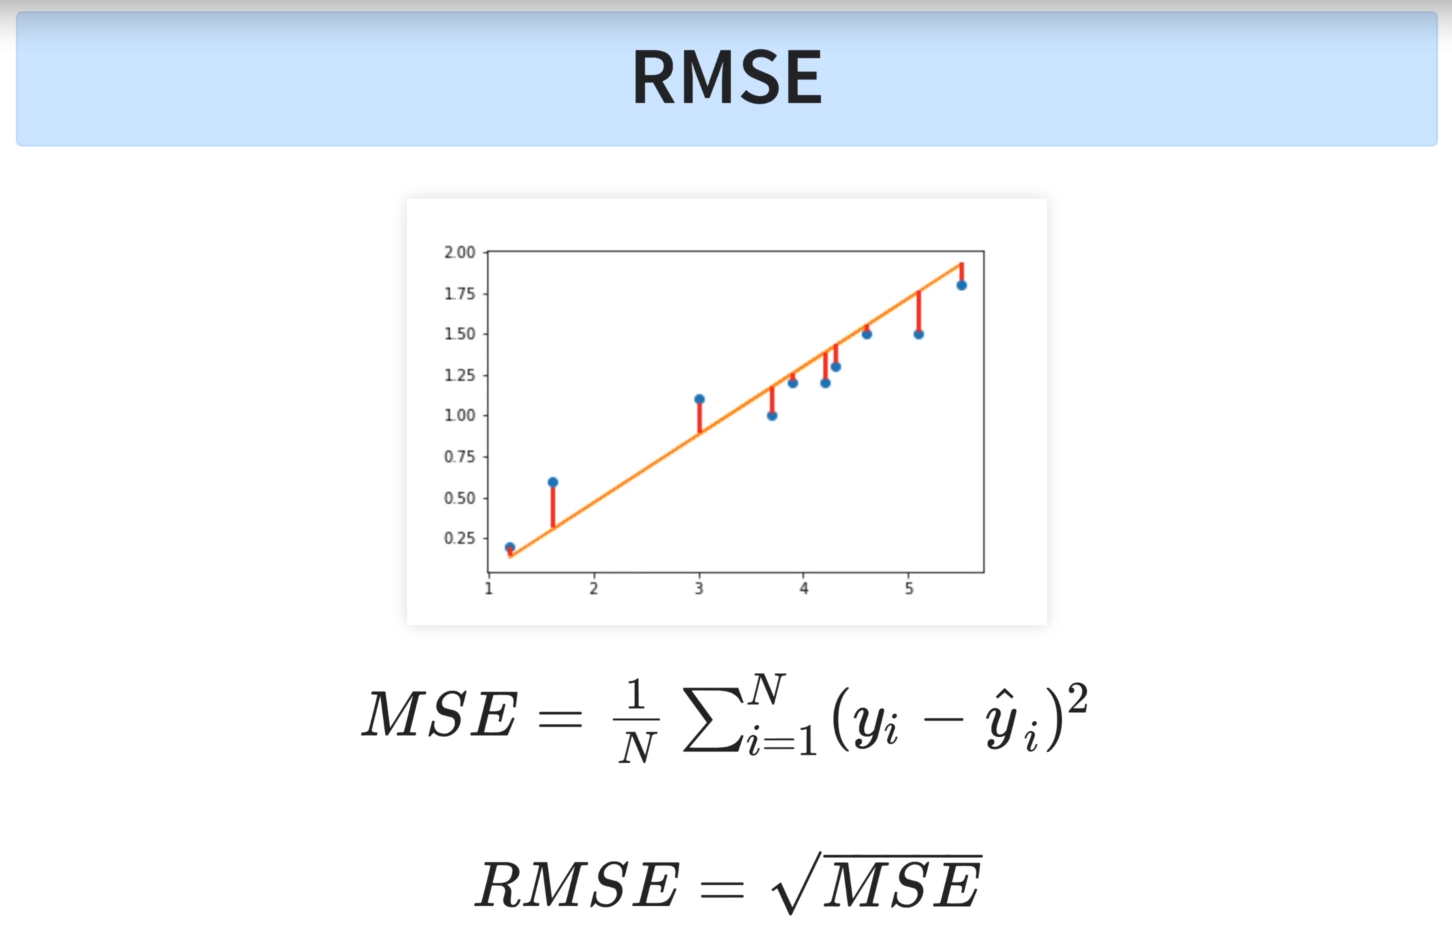

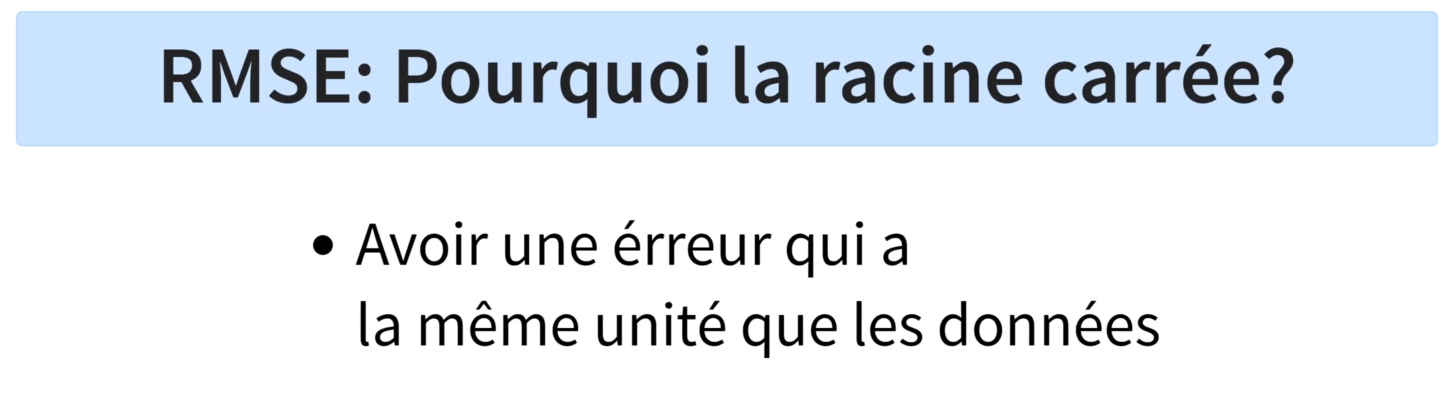

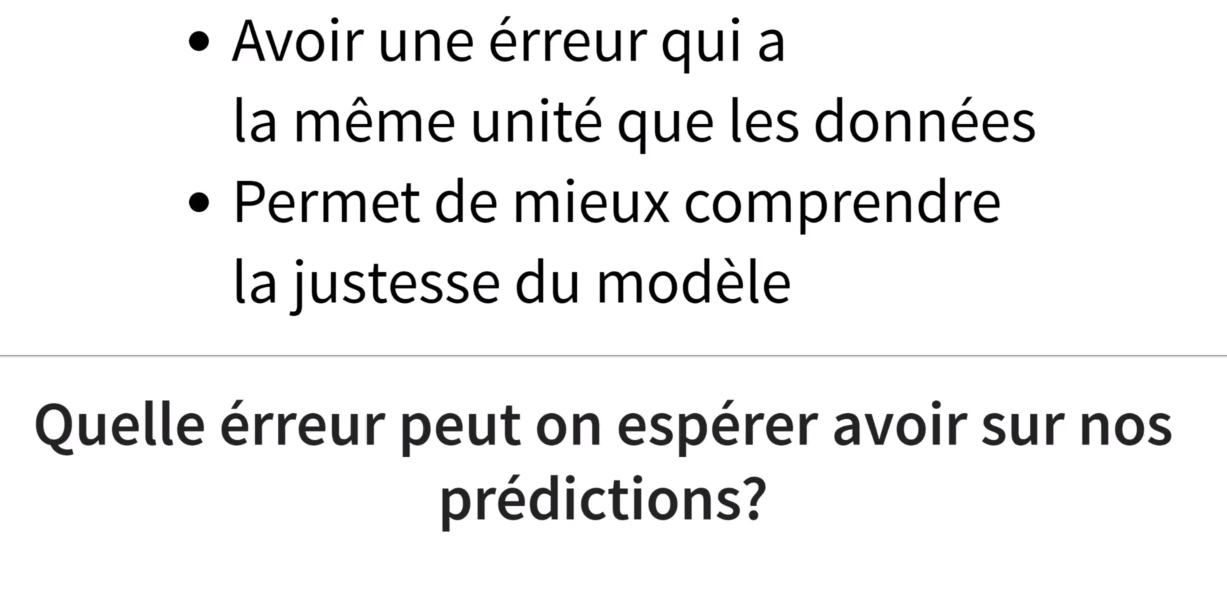

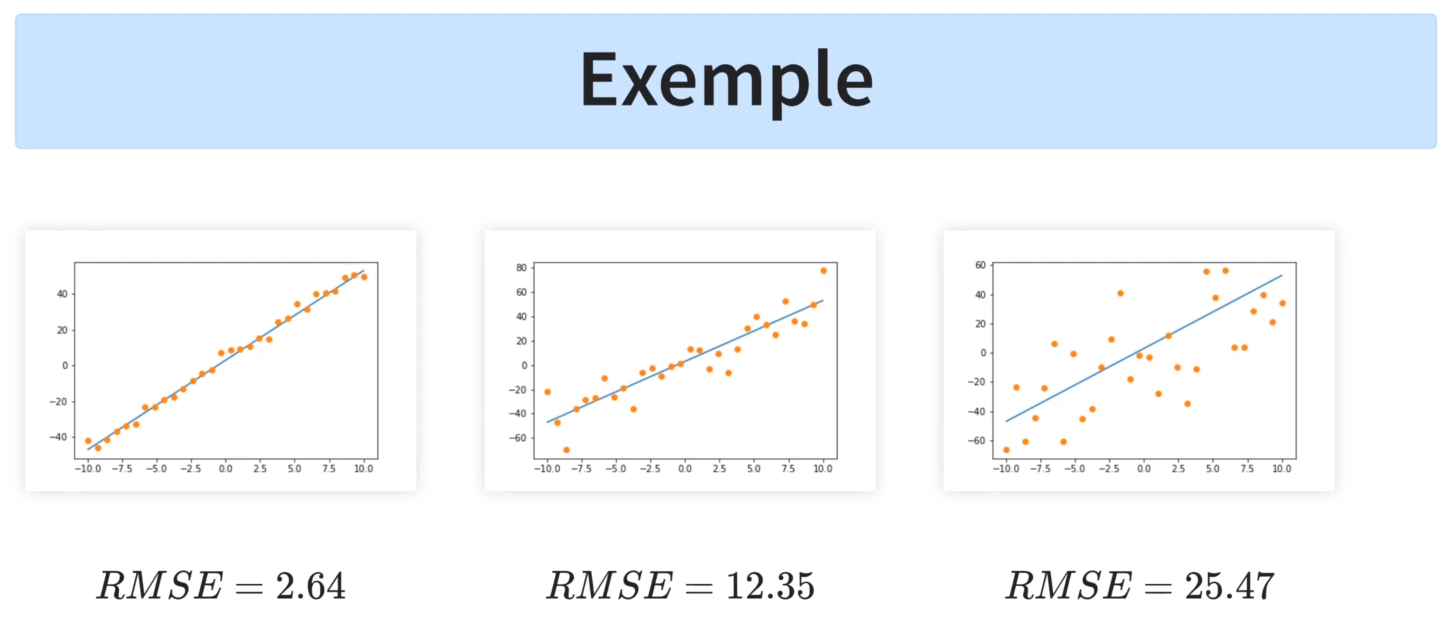

# R_squared

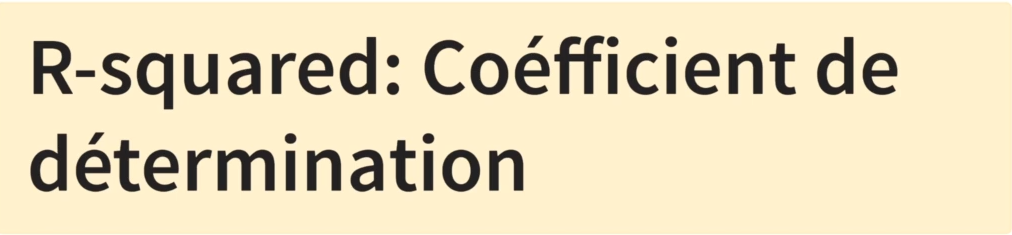

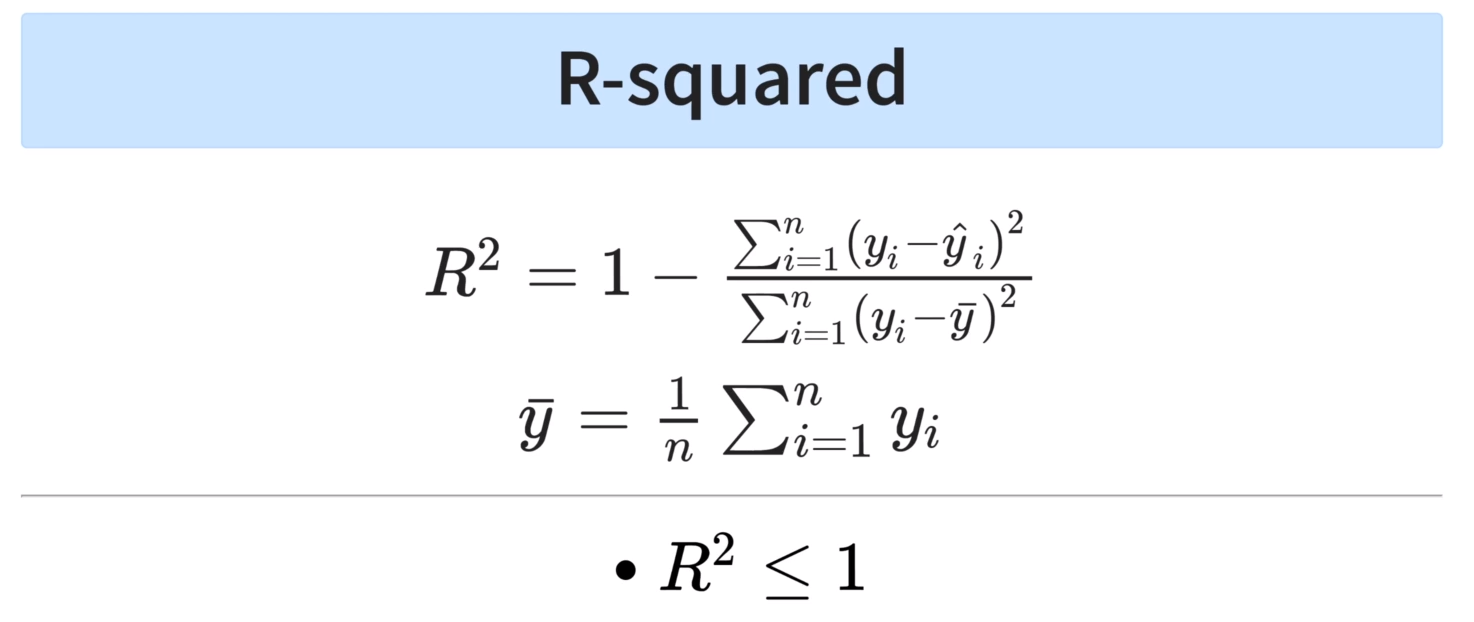

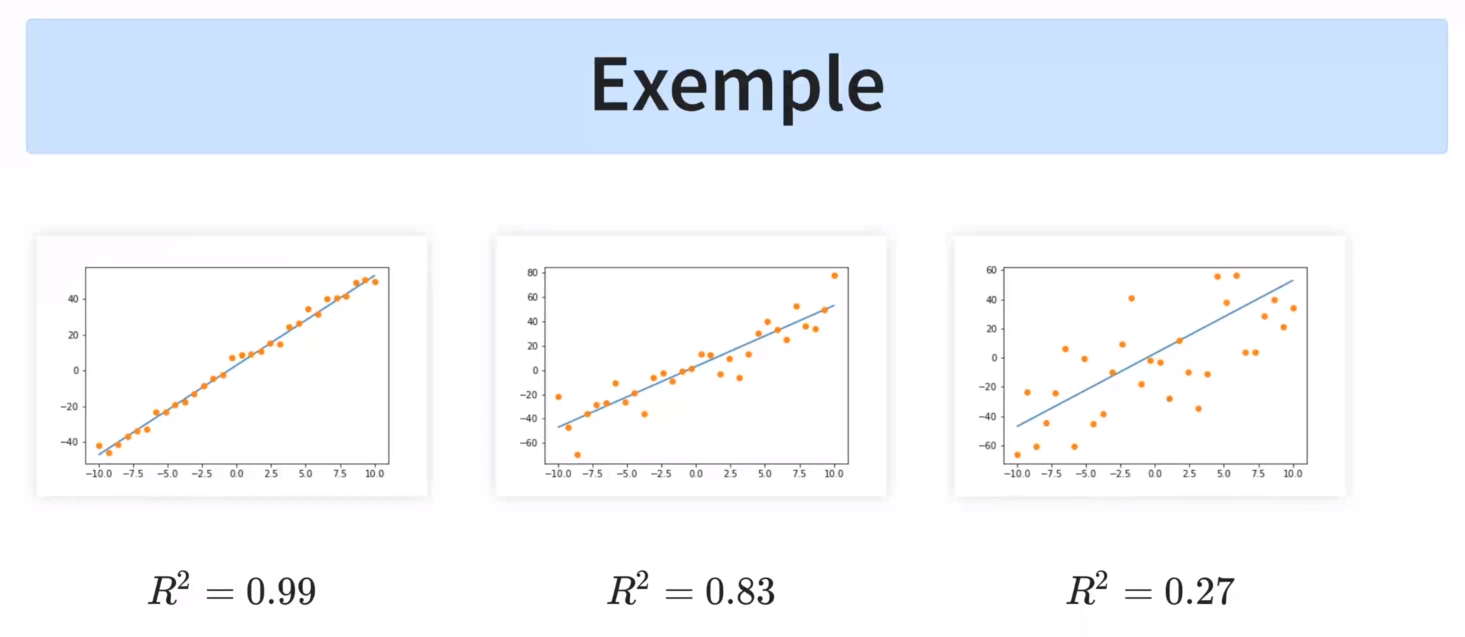

# Dataset d'entraînement et de test

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('iris.csv')

In [5]:
dataset.shape

(150, 5)

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
from sklearn.model_selection import train_test_split

X = dataset[['petal_length', 'petal_width']]
y = dataset[['class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(150, 2)
(120, 2)
(30, 2)


In [10]:
X_train.head()

,petal_length,petal_width
22,1.0,0.2
15,1.5,0.4
65,4.4,1.4
11,1.6,0.2
42,1.3,0.2


In [11]:
y_train.head()

,class
22,Iris-setosa
15,Iris-setosa
65,Iris-versicolor
11,Iris-setosa
42,Iris-setosa


In [12]:
X_train.to_csv("iris_train.csv")
X_test.to_csv("iris_test.csv")

# Évaluation des performances

In [13]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
train = pd.read_csv("iris_train.csv")
train.head()

,Unnamed: 0,petal_length,petal_width
0,22,1.0,0.2
1,15,1.5,0.4
2,65,4.4,1.4
3,11,1.6,0.2
4,42,1.3,0.2


In [15]:
test = pd.read_csv("iris_test.csv")
test.head()

,Unnamed: 0,petal_length,petal_width
0,73,4.7,1.2
1,18,1.7,0.3
2,118,6.9,2.3
3,78,4.5,1.5
4,76,4.8,1.4


In [16]:
x_train = train['petal_length'].values
y_train = train['petal_width'].values
x_test = test['petal_length'].values
y_test = test['petal_width'].values

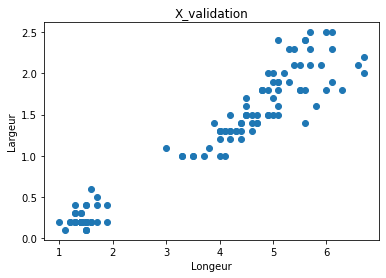

In [17]:
plt.plot(x_train, y_train, 'o')
plt.title('X_validation')
plt.xlabel('Longeur')
plt.ylabel('Largeur')
plt.show()

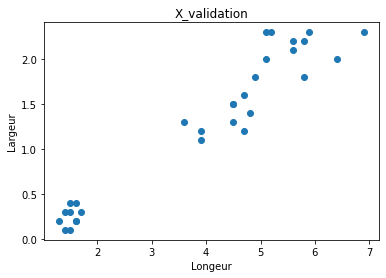

In [18]:
plt.plot(x_test, y_test, 'o')
plt.title('X_validation')
plt.xlabel('Longeur')
plt.ylabel('Largeur')
plt.show()


In [19]:
X = x_train.reshape(-1, 1)
y = y_train.reshape(-1, 1)

modele = linear_model.LinearRegression()
modele.fit(X, y)

X_test = x_test.reshape(-1, 1)
y_test_pred = modele.predict(X_test)

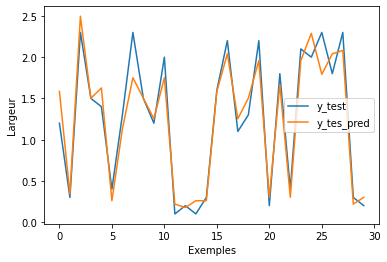

In [20]:
plt.plot(y_test, label='y_test')
plt.plot(y_test_pred, label='y_tes_pred')
plt.xlabel('Exemples')
plt.ylabel('Largeur')
plt.legend()
plt.show()

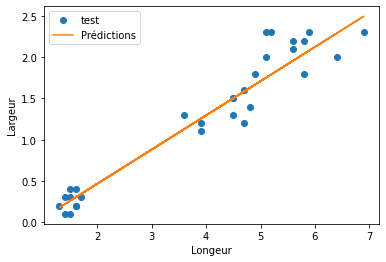

In [21]:
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x_test, y_test_pred, label='Prédictions')
plt.xlabel('Longeur')
plt.ylabel('Largeur')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_test_pred)
mse_test

0.04557819994873106

In [23]:
from math import sqrt
sqrt(mse_test)

0.21349051489171844

In [24]:
r2_test = r2_score(y_test, y_test_pred)
r2_test

0.9282973309202085

In [25]:
y_train_pred = modele.predict(X)

mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE train", mse_train)
print("MSE test", mse_test)
print("RMSE train", sqrt(mse_train))
print("RMSE test", sqrt(mse_test))

MSE train 0.04150255793397939
MSE test 0.04557819994873106
RMSE train 0.20372176597992514
RMSE test 0.21349051489171844
